In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../Instructions/Pymaceuticals/data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../Instructions/Pymaceuticals/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata = pd.read_csv(mouse_drug_data_to_load)
ctdata = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(mousedata, ctdata, on="Mouse ID")
combined_data = combined_data.loc[(combined_data["Drug"] == "Capomulin")| 
                                    (combined_data["Drug"] == "Infubinol")|
                                    (combined_data["Drug"] == "Ketapril")|
                                    (combined_data["Drug"] == "Placebo")]
end_time = combined_data["Timepoint"].max()
# Display the data table for preview
combined_data

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
t_vol = combined_data.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)']
t_vol.head()
                              
# Convert to DataFrame
t_vol_df = pd.DataFrame(
    t_vol.mean()
)
# Preview DataFrame
t_vol_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958
Placebo   0                   45.000000
          5                   47.125589
          10                  49.423329
          15                  51.359742
          20                  54.364417
          25                  57.482574
          30                  59.809063
          35                  62.420615
          40                  65.052675
          45                  68.084082

In [71]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = combined_data.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
se_df = pd.DataFrame(
    standard_error
)
# Preview DataFrame
se_df.loc['Capomulin']['Tumor Volume (mm3)']

Timepoint
0     0.000000
5     0.448593
10    0.702684
15    0.838617
20    0.909731
25    0.881642
30    0.934460
35    1.052241
40    1.223608
45    1.223977
Name: Tumor Volume (mm3), dtype: float64

In [5]:
# Minor Data Munging to Re-Format the Data Frames
t_vol_reworked = pd.pivot_table(t_vol_df, values = 'Tumor Volume (mm3)', index=['Timepoint'], columns = 'Drug').reset_index()
se_df_reworked = pd.pivot_table(se_df, values = 'Tumor Volume (mm3)', index=['Timepoint'], columns = 'Drug').reset_index()
# Preview that Reformatting worked
t_vol_reworked

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


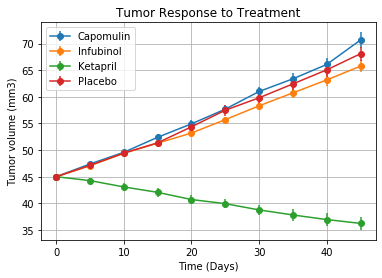

In [97]:
# Generate the Plot (with Error Bars)
plt.errorbar(t_vol_reworked.Timepoint,t_vol_reworked.Ketapril,yerr=se_df.loc['Ketapril']['Tumor Volume (mm3)'],fmt="-o")
plt.errorbar(t_vol_reworked.Timepoint,t_vol_reworked.Infubinol,yerr=se_df.loc['Infubinol']['Tumor Volume (mm3)'],fmt="-o")
plt.errorbar(t_vol_reworked.Timepoint,t_vol_reworked.Capomulin,yerr=se_df.loc['Capomulin']['Tumor Volume (mm3)'],fmt="-o")
plt.errorbar(t_vol_reworked.Timepoint,t_vol_reworked.Placebo,yerr=se_df.loc['Placebo']['Tumor Volume (mm3)'],fmt="-o")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor volume (mm3)")
plt.legend(t_vol_means)
plt.grid()



In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites = combined_data.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()
# Convert to DataFrame
metsites_df = pd.DataFrame(
    met_sites
)
# Preview DataFrame
metsites_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
Ketapril  0                  0.000000
          5                  0.304348
          10                 0.590909
          15                 0.842105
          20                 1.210526
          25                 1.631579
          30                 2.055556
          35                 2.294118
          40                 2.733333
          45                 3.363636
Placebo   0                  0.000000
          5                  0.375000
          10                 0.833333
          15                 1.250000
          20                 1.526316
          25                 1.941176
          30                 2.266667
          35                 2.642857
          40                 3.166667
          45                 3.272727

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
standard_error_metsites = combined_data.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()
# Convert to DataFrame
se_ms_df = pd.DataFrame(
    standard_error_metsites
)
# Preview DataFrame
se_ms_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
Ketapril  0                  0.000000
          5                  0.098100
          10                 0.142018
          15                 0.191381
          20                 0.236680
          25                 0.288275
          30                 0.347467
          35                 0.361418
          40                 0.315725
          45                 0.278722
Placebo   0                  0.000000
          5                  0.100947
          10                 0.115261
          15                 0.190221
          20                 0.234064
          25                 0.263888
          30                 0.300264
          35                 0.341412
          40                 0.297294
          45                 0.304240

In [9]:
# Minor Data Munging to Re-Format the Data Frames
metsites_reworked = pd.pivot_table(metsites_df, values = 'Metastatic Sites', index=['Timepoint'], columns = 'Drug').reset_index()
se_ms_reworked = pd.pivot_table(se_ms_df, values = 'Metastatic Sites', index=['Timepoint'], columns = 'Drug').reset_index()
metsites_reworked

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


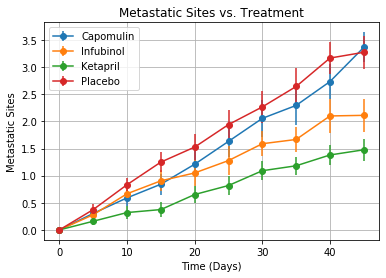

In [96]:
# Generate the Plot (with Error Bars)
plt.errorbar(t_vol_reworked.Timepoint,met_sites.Ketapril,yerr=se_ms_df.loc['Ketapril']['Metastatic Sites'],fmt="-o")
plt.errorbar(t_vol_reworked.Timepoint,met_sites.Infubinol,yerr=se_ms_df.loc['Infubinol']['Metastatic Sites'],fmt="-o")
plt.errorbar(t_vol_reworked.Timepoint,met_sites.Capomulin,yerr=se_ms_df.loc['Capomulin']['Metastatic Sites'],fmt="-o")
plt.errorbar(t_vol_reworked.Timepoint,met_sites.Placebo,yerr=se_ms_df.loc['Placebo']['Metastatic Sites'],fmt="-o")
plt.title("Metastatic Sites vs. Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(t_vol_means)
plt.grid()



In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combined_data.groupby(["Drug", "Timepoint"])['Mouse ID'].count()
mouse_df = pd.DataFrame(
    mouse_count
)
# Preview DataFrame
mouse_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
Ketapril  0                25
          5                23
          10               22
          15               19
          20               19
          25               19
          30               18
          35               17
          40               15
          45               11
Placebo   0                25
          5                24
          10               24
          15               20
          20               19
          25               17
          30               15
          35               14
          40               12
          45               11

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_reworked = pd.pivot_table(mouse_df, values = 'Mouse ID', index=['Timepoint'], columns = 'Drug').reset_index()
mice_reworked

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


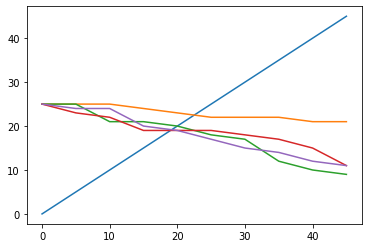

In [108]:
# Generate the Plot (Accounting for percentages)
micecount = mice_reworked.iloc[0:100,1:11]
initialmice = micecount.iloc[0,0:10]
mouse_pct = micecount / initialmice *100
mouse_df_reworked = pd.pivot_table(mouse_df, values = 'Mouse ID', index=['Timepoint'], columns = 'Drug').reset_index()
mouse_df_reworked
fig, ax = plt.subplots();
mice_graph = ax.plot(mouse_df_reworked['Timepoint'], mouse_df_reworked)
mice_graph